## EDA

- Previously we examined the various tables in the database to identify key variables, understand their relationships and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

### Importing necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, ScalarFormatter
import seaborn as sns
import sqlite3
import scipy.stats as stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [2]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DATA_DIR = os.path.join(BASE_DIR, 'data')
DB_PATH = os.path.join(DATA_DIR, 'company-inventory.db')

In [3]:
connection = sqlite3.connect(DB_PATH)
connection

### Fetching vendor_summary data

In [4]:
df = pd.read_sql_query("SELECT * FROM vendor_summary", connection)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [5]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorNumber           10692 non-null  int64  
 1   VendorName             10692 non-null  object 
 2   Brand                  10692 non-null  int64  
 3   Description            10692 non-null  object 
 4   PurchasePrice          10692 non-null  float64
 5   ActualPrice            10692 non-null  float64
 6   Volume                 10692 non-null  float64
 7   TotalPurchaseQuantity  10692 non-null  int64  
 8   TotalPurchaseDollars   10692 non-null  float64
 9   TotalSalesQuantity     10692 non-null  float64
 10  TotalSalesDollars      10692 non-null  float64
 11  TotalSalesPrice        10692 non-null  float64
 12  TotalExciseTax         10692 non-null  float64
 13  FreightCost            10692 non-null  float64
 14  GrossProfit            10692 non-null  float64
 15  Pr

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


### Numerical and categorical columns

In [6]:
numerical_cols = df.select_dtypes(include = np.number).columns
numerical_cols

Index(['VendorNumber', 'Brand', 'PurchasePrice', 'ActualPrice', 'Volume',
       'TotalPurchaseQuantity', 'TotalPurchaseDollars', 'TotalSalesQuantity',
       'TotalSalesDollars', 'TotalSalesPrice', 'TotalExciseTax', 'FreightCost',
       'GrossProfit', 'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [7]:
categorical_cols = df.select_dtypes(exclude = np.number).columns
categorical_cols

Index(['VendorName', 'Description'], dtype='object')

### Distribution plots for numerical columns

In [8]:
# List of numerical columns
numerical_cols = [
    'PurchasePrice', 'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
    'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
    'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
    'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'
]

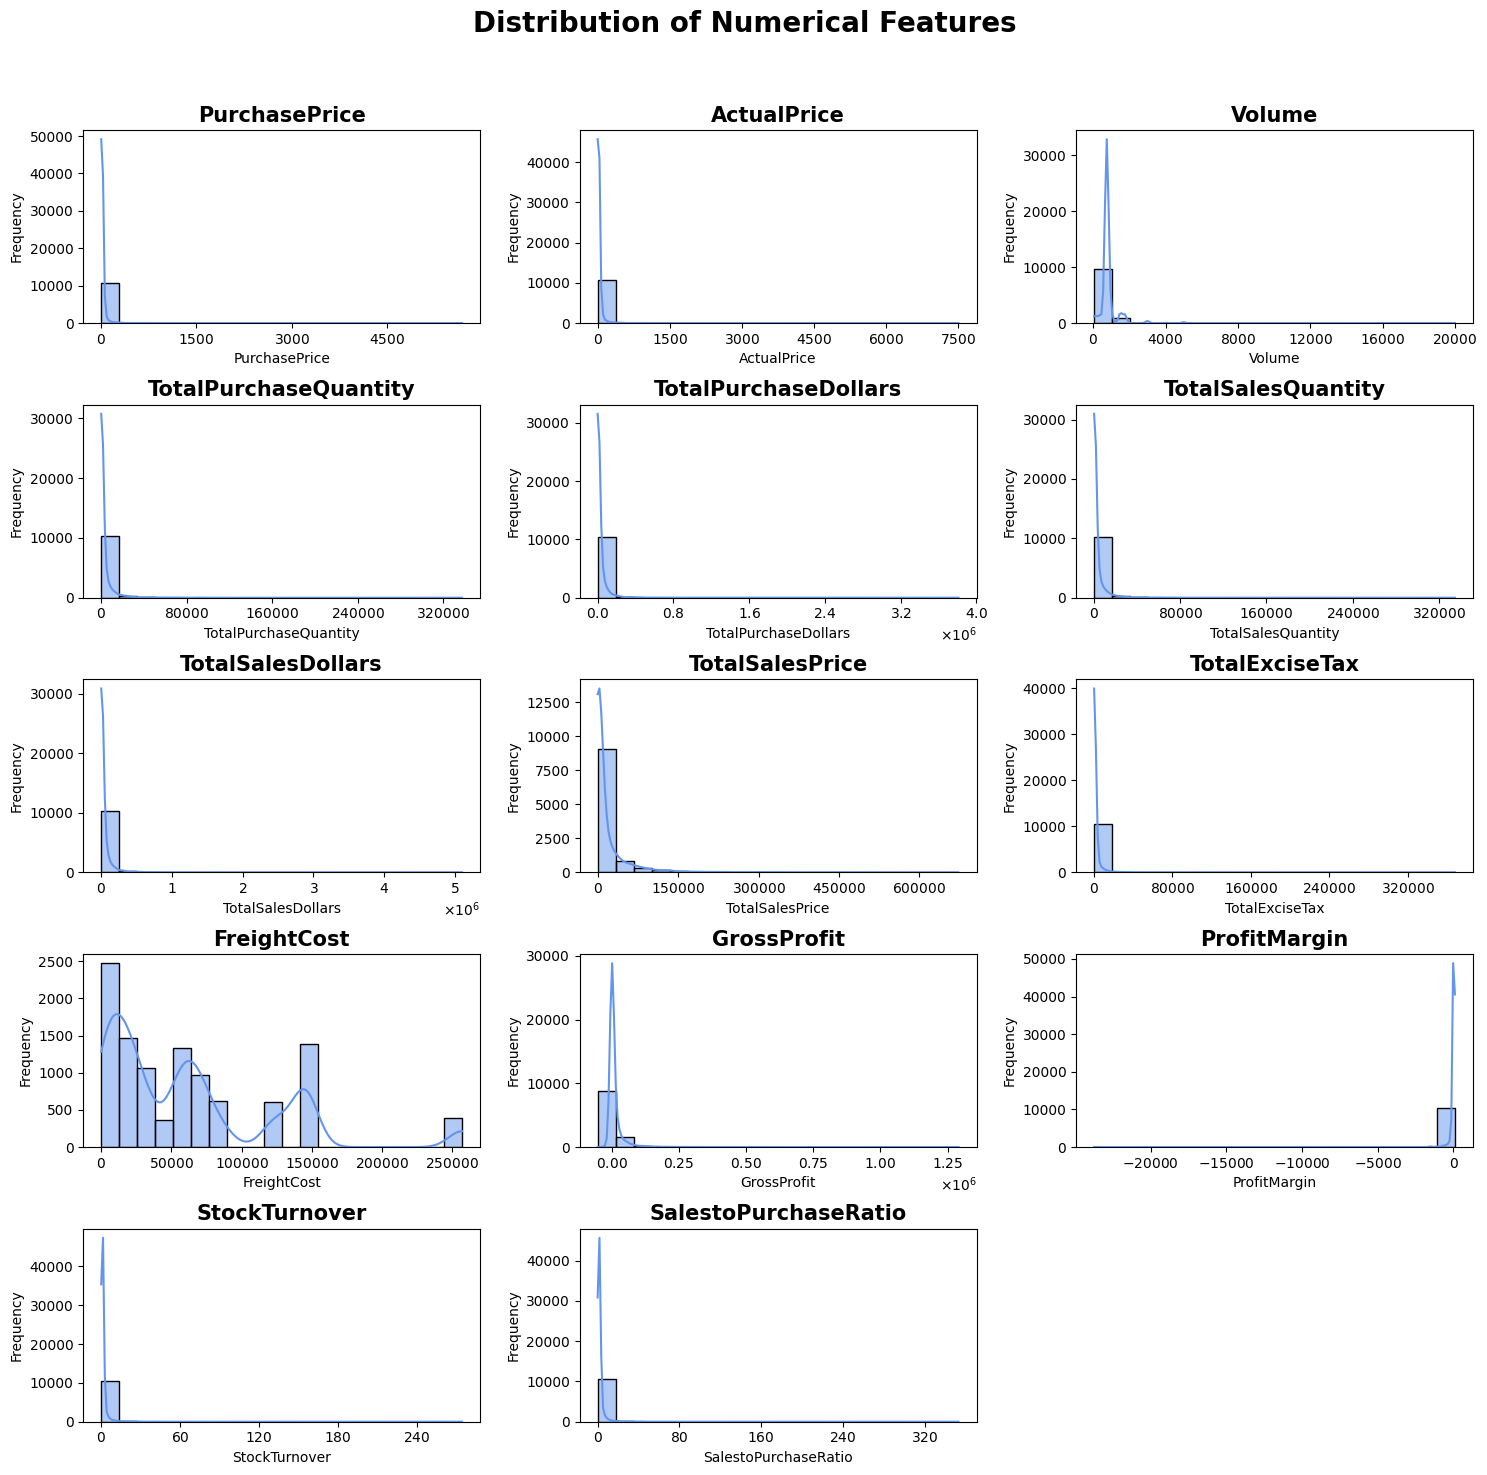

In [9]:
# Set figure size based on number of plots
n_cols = 3
n_rows = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 15), sharex = False)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df[col], kde = True, bins = 20, ax = ax,
                 color = 'cornflowerblue', edgecolor = 'black')
    ax.set_title(col, fontsize = 15, fontweight = 'bold')
    ax.set_xlabel(col, fontsize = 10)
    ax.set_ylabel('Frequency', fontsize = 10)

    # Rotate x-axis labels
    ax.tick_params(axis = 'x', rotation = 0)
    
    # Reduce number of x-ticks
    ax.xaxis.set_major_locator(MaxNLocator(nbins = 6, prune = 'both'))

    # Format x-ticks in scientific notation if large values
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText = True))

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Numerical Features', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.show()

### Boxplots

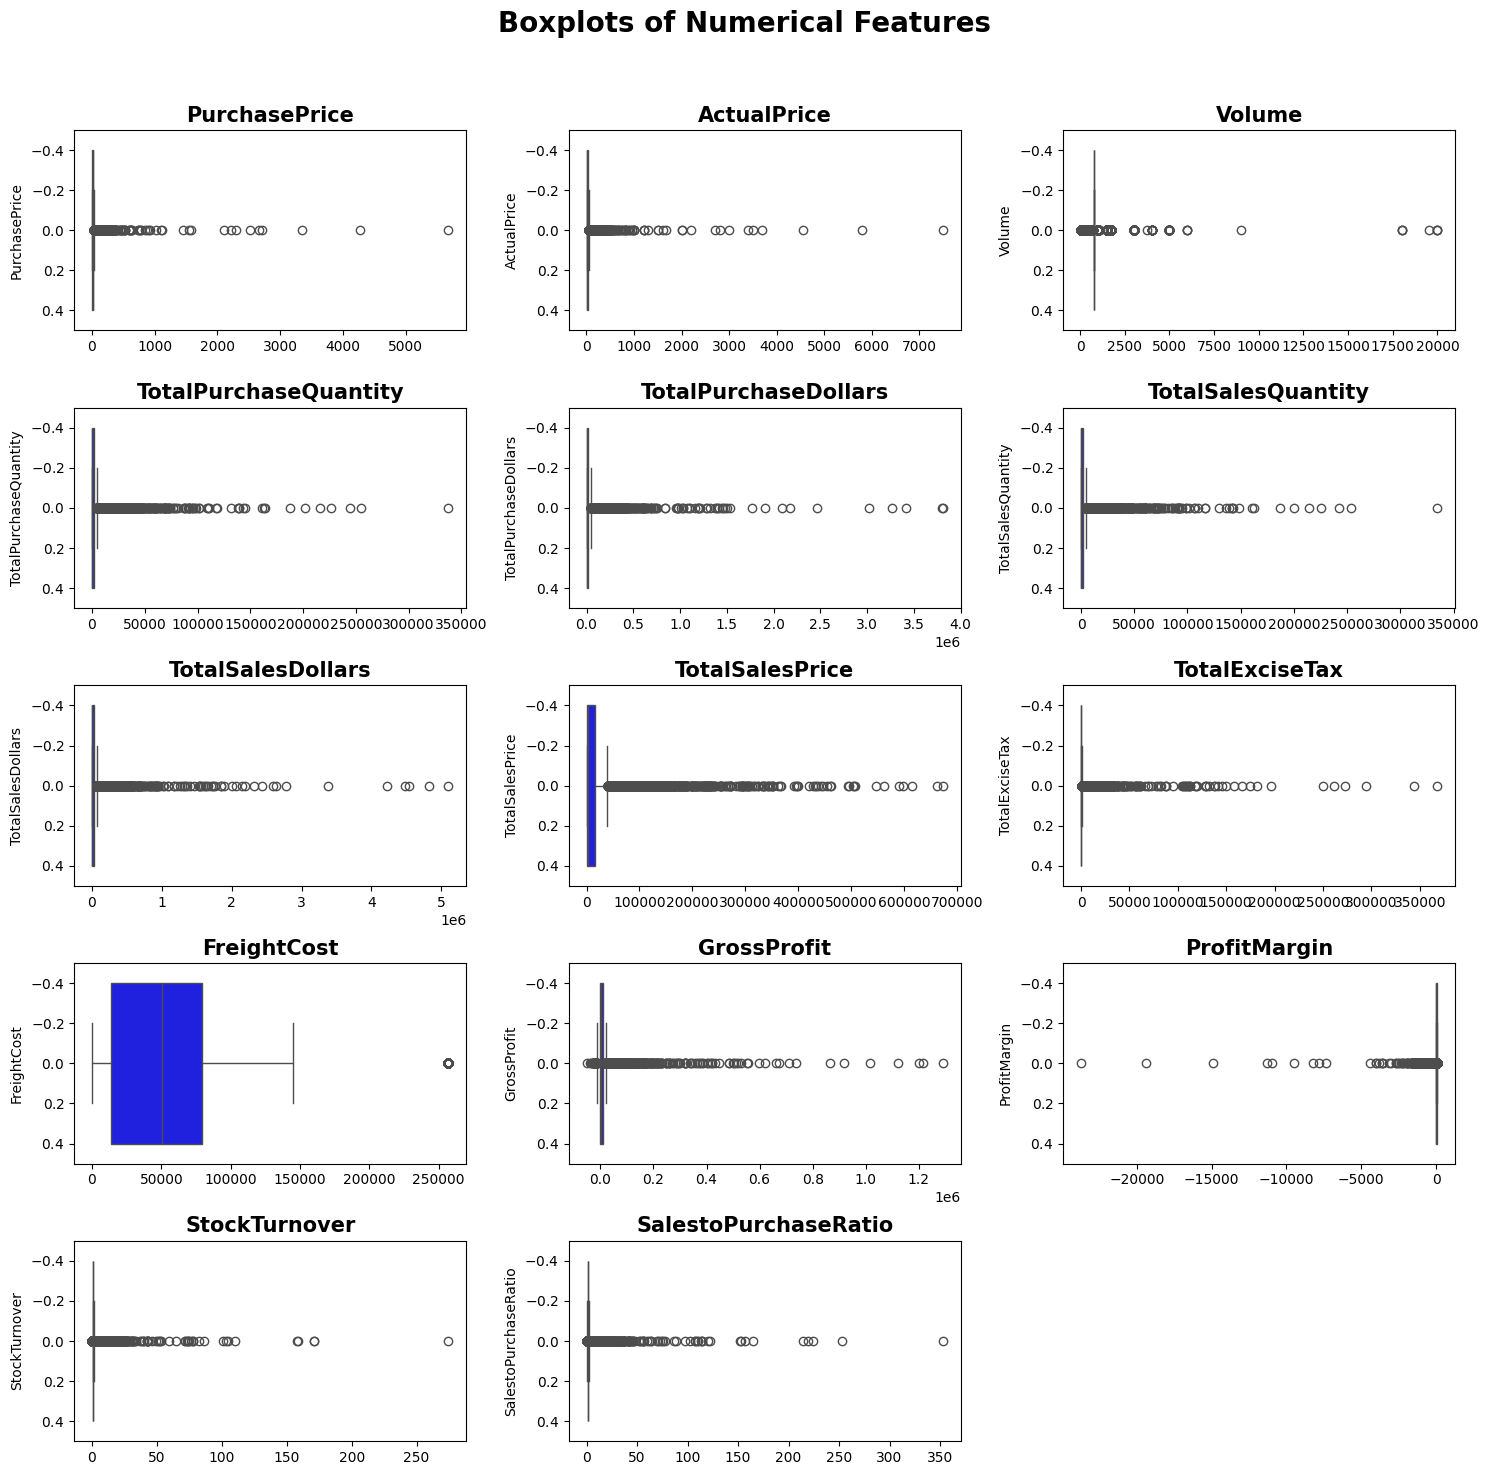

In [10]:
# Set figure size based on number of plots
n_cols = 3
n_rows = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 15), sharex = False)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(x = df[col], ax = ax, color = 'blue')
    ax.set_title(col, fontsize = 15, fontweight = 'bold')
    ax.set_xlabel('')
    ax.set_ylabel(col, fontsize = 10)

    # Format y-ticks in scientific notation if large values
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText = True))
    ax.yaxis.set_major_locator(MaxNLocator(nbins = 6, prune = 'both'))

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Boxplots of Numerical Features', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.show()

## Summary and Statistics Insights

### Negative and Zero Values:

- Gross Profit: Minimum value is -52,000.78, indicating losses. Some products or transactions may be running at a loss due to high costs or selling at discounts lower than the purchase price.
- Profit Margin: Has a minimum of -infinity, suggesting cases where revenue is zero or even lower than costs.
- Total Sales Quantity and Total Sales Dollars: Minimum values are zero, meaning some products were purchased but never sold. These could be slow moving or obsolete stock.

### Outliers indicated by high standard deviations:

- Purchase and Actual Prices: The max values (5681.81 and 7499.99) are significantly higher than the mean (24.39 and 35.64) values, indicating potential premium products.
- Freight Cost: Hugh variation, from 0.09 to 257,032.07, suggesting logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products get sold extremely fast while others take considerable amount of time and remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that products is higher than the purchase quantity, due to sales being fulfilled from older stock.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Let's filter out data by removing inconsistencies

In [11]:
df = pd.read_sql_query(
    """
    SELECT *
    FROM vendor_summary
    WHERE GrossProfit > 0
    AND ProfitMargin > 0
    AND TotalSalesQuantity > 0
    """, connection
)

df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


### Distribution plots for filtered data

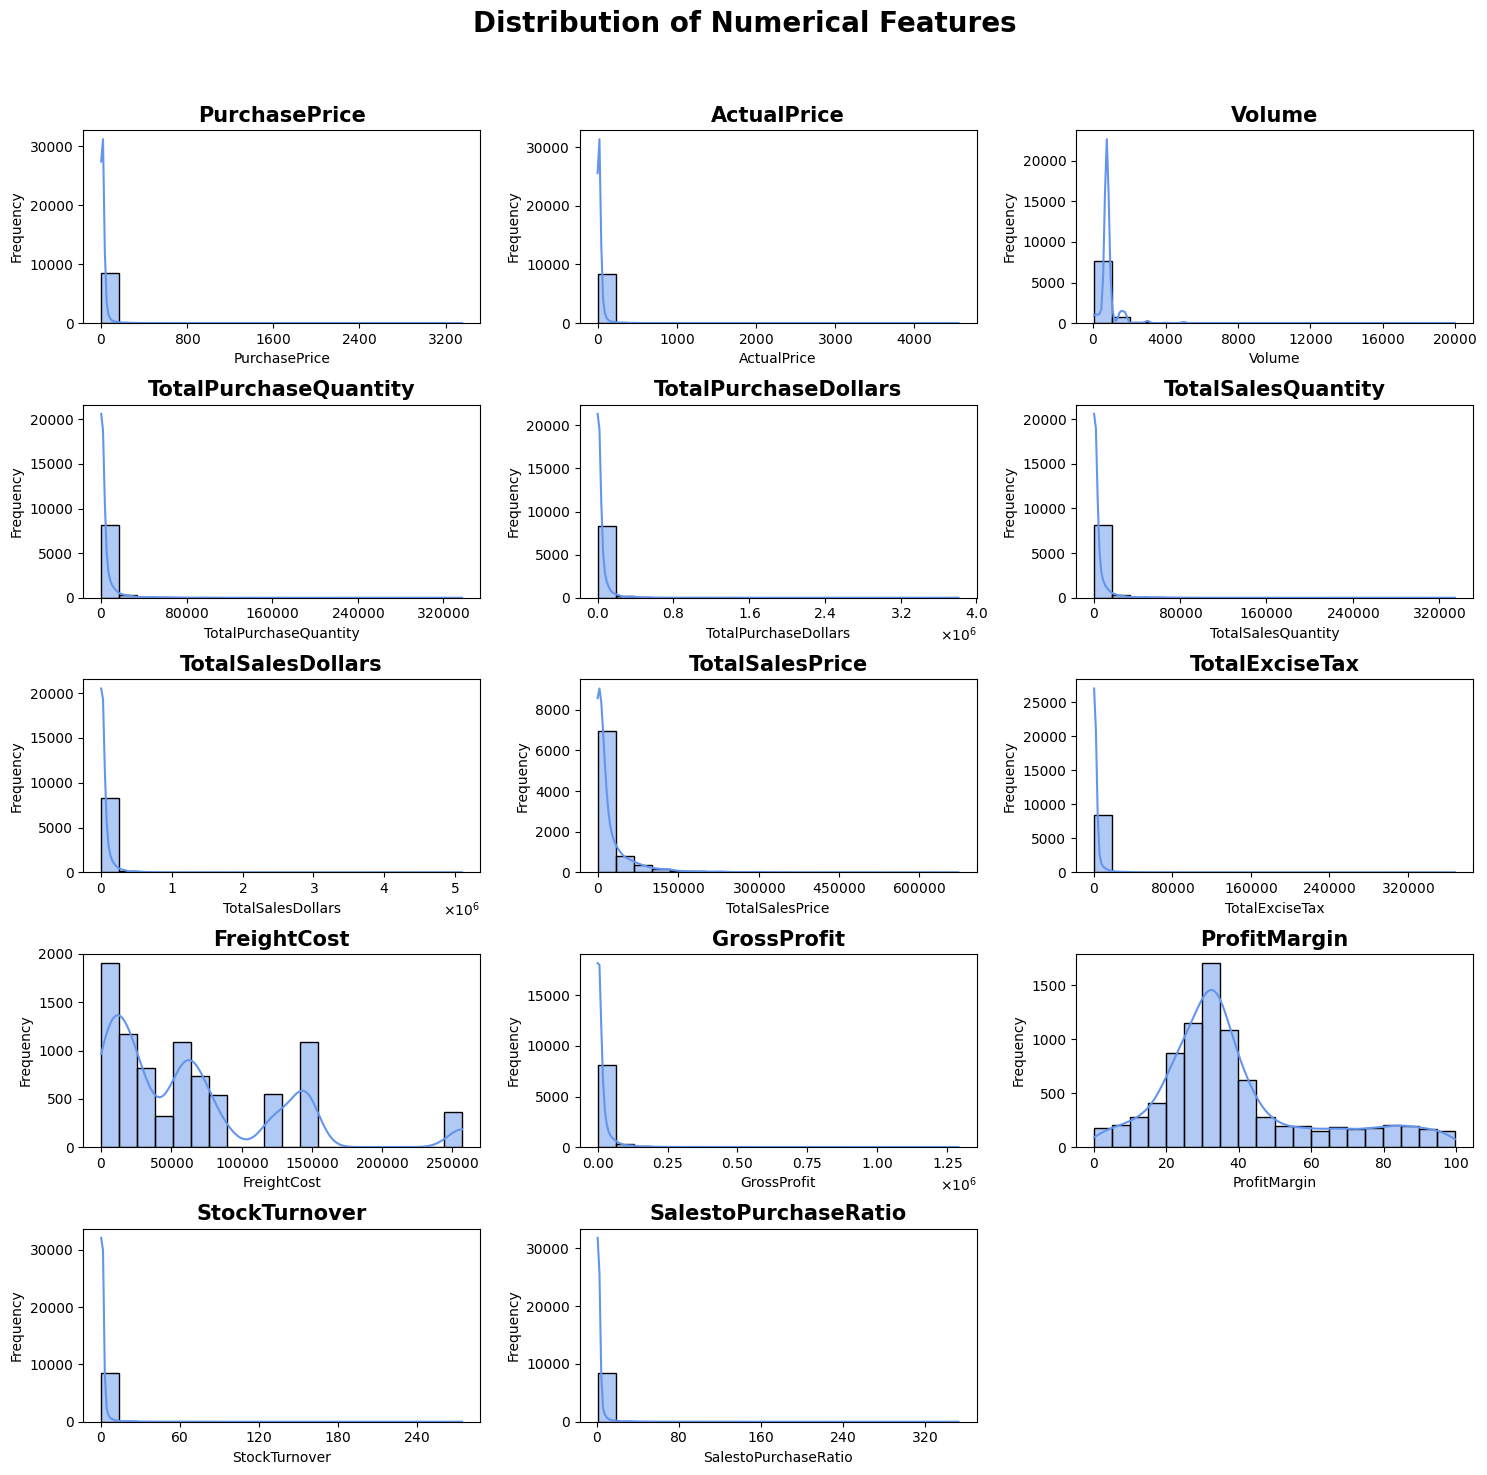

In [12]:
# Set figure size based on number of plots
n_cols = 3
n_rows = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 15), sharex = False)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df[col], kde = True, bins = 20, ax = ax,
                 color = 'cornflowerblue', edgecolor = 'black')
    ax.set_title(col, fontsize = 15, fontweight = 'bold')
    ax.set_xlabel(col, fontsize = 10)
    ax.set_ylabel('Frequency', fontsize = 10)

    # Rotate x-axis labels
    ax.tick_params(axis = 'x', rotation = 0)
    
    # Reduce number of x-ticks
    ax.xaxis.set_major_locator(MaxNLocator(nbins = 6, prune = 'both'))

    # Format x-ticks in scientific notation if large values
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText = True))

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Numerical Features', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.show()

### Distribution plots for categorical columns

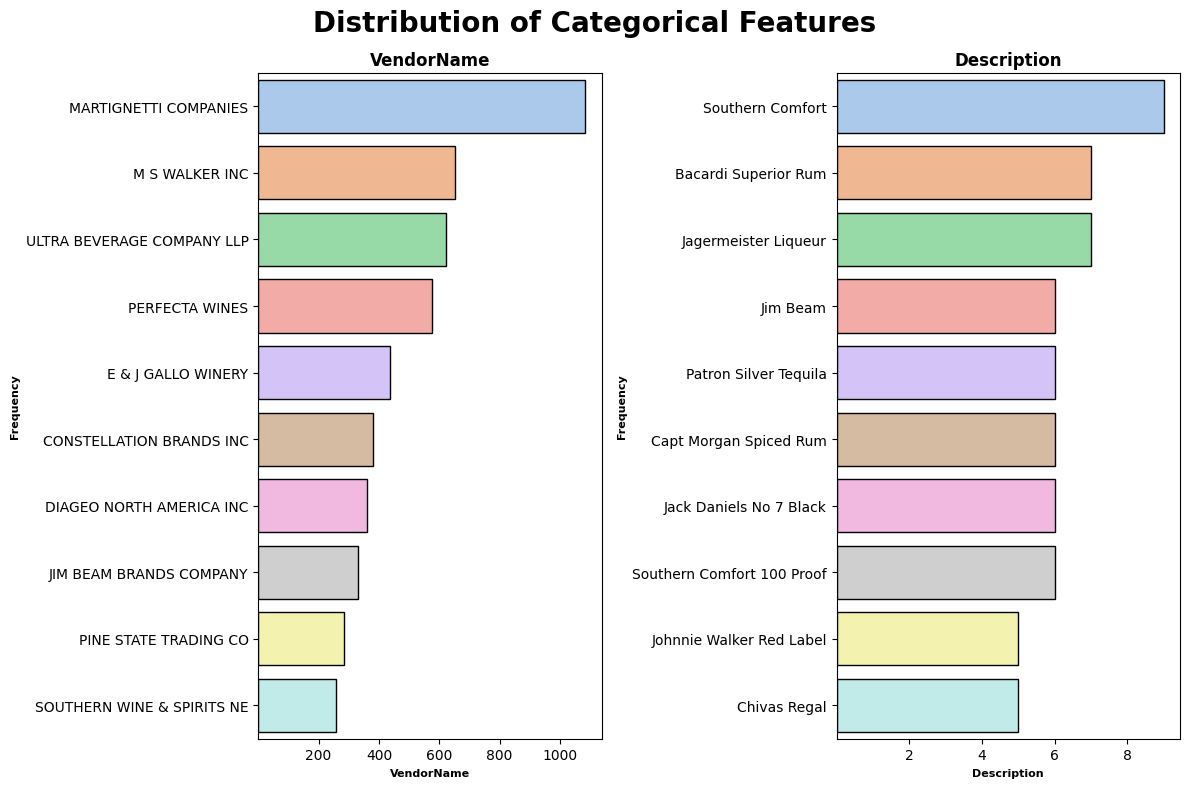

In [13]:
# Set figure size based on number of plots
n_cols = 2
n_rows = 1

fig, axes = plt.subplots(n_rows, n_cols, figsize = (12, 8), sharex = False)
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10], ax = ax, palette = 'pastel', edgecolor = 'black')
    ax.set_title(col, fontsize = 12, fontweight = 'bold')
    ax.set_xlabel(col, fontsize = 8, fontweight = 'bold')
    ax.set_ylabel('Frequency', fontsize = 8, fontweight = 'bold')

    # Rotate x-axis labels
    ax.tick_params(axis = 'x', rotation = 0)
    
    # Reduce number of x-ticks
    ax.xaxis.set_major_locator(MaxNLocator(nbins = 6, prune = 'both'))

# Hide any unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Categorical Features', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.show()

### Heatmap for finding correlation between numerical columns

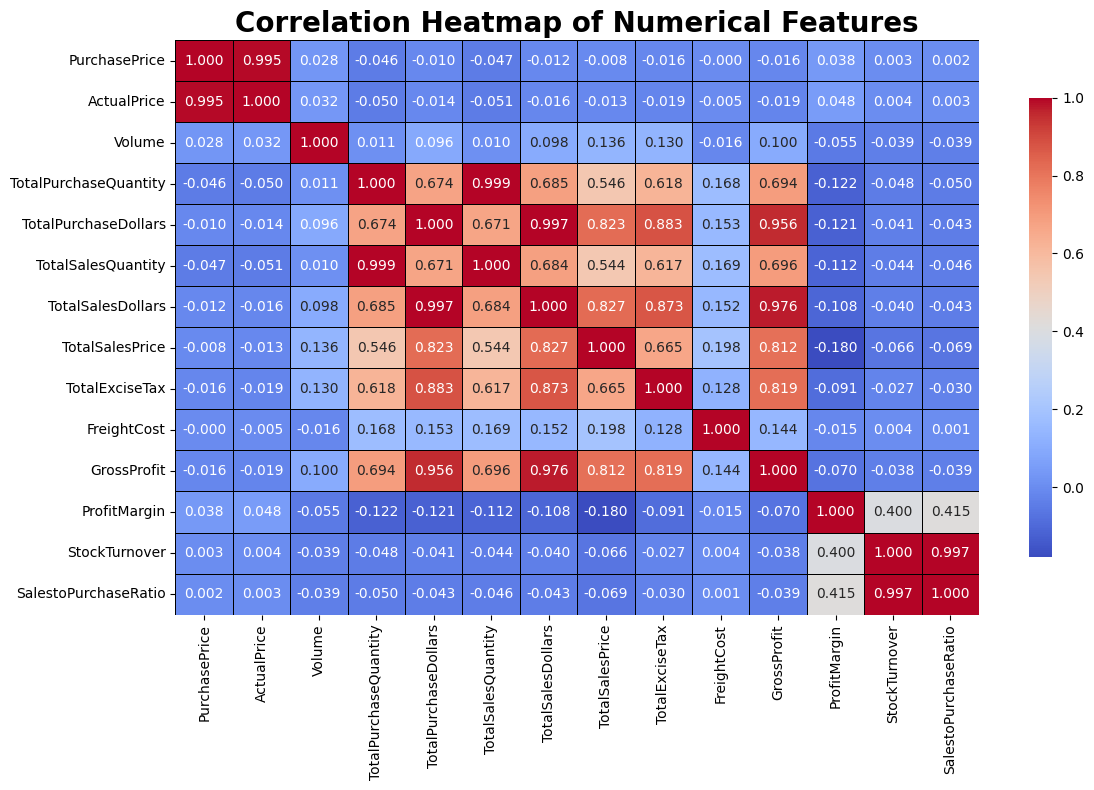

In [14]:
## Correlation heatmap

plt.figure(figsize = (12, 8))
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(
    correlation_matrix,
    annot = True,
    fmt = '.3f',
    cmap = 'coolwarm',
    linewidths = 0.5,
    linecolor = 'black',
    cbar_kws = {'shrink': 0.8}
)

plt.title('Correlation Heatmap of Numerical Features', fontsize = 20, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

### Correlation Insights

- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit
- Strong correlation between TotalPurchaseQuantity and TotalSalesQuantity (0.999), confirming efficient inventory turnover
- Negative correlation between profit margin and total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures
- StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover doesn't necessarily result in higher profitability

## Data Analysis with Research Questions

### 1. Identify Brands that need Promotional or Pricing adjustments which exhibit lower sales performance but higher profit margins

In [15]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index().sort_values(by = ['TotalSalesDollars', 'ProfitMargin'], ascending = [True, False])

brand_performance

,Description,TotalSalesDollars,ProfitMargin
6942,Terruzzi & Puthod Vernaccia,4.99,32.464930
2897,Firefly Ridge Chard,5.79,31.088083
148,Albero Sparkling Wh Organic,5.79,28.497409
6488,Smirnoff Light Strawberry,5.94,50.168350
178,Allen's Blue Curacao Liqueur,5.99,20.033389
...,...,...,...
86,Absolut 80 Proof,6244752.03,27.051973
1272,Capt Morgan Spiced Rum,6356320.62,27.261764
3402,Grey Goose Vodka,7209608.06,25.413817
7114,Tito's Handmade Vodka,7399657.58,28.953634


In [16]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

print(low_sales_threshold)
print(high_margin_threshold)

560.299
64.97017552750113


In [17]:
## Filter brands with low sales and high profit margin

target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
].reset_index(drop = True)

target_brands

,Description,TotalSalesDollars,ProfitMargin
0,Santa Rita Organic Svgn Bl,9.99,66.466466
1,Debauchery Pnt Nr,11.58,65.975820
2,Concannon Glen Ellen Wh Zin,15.95,83.448276
3,Crown Royal Apple,27.86,89.806174
4,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
193,Nanbu Bijin Southern Beauty,535.68,76.747312
194,Dad's Hat Rye Whiskey,538.89,81.851584
195,A Bichot Clos Marechaudes,539.94,67.740860
196,Sbragia Home Ranch Merlot,549.75,66.444748


In [18]:
brand_performance_limit = brand_performance[brand_performance['TotalSalesDollars'] <= 10000] ## For better visualization

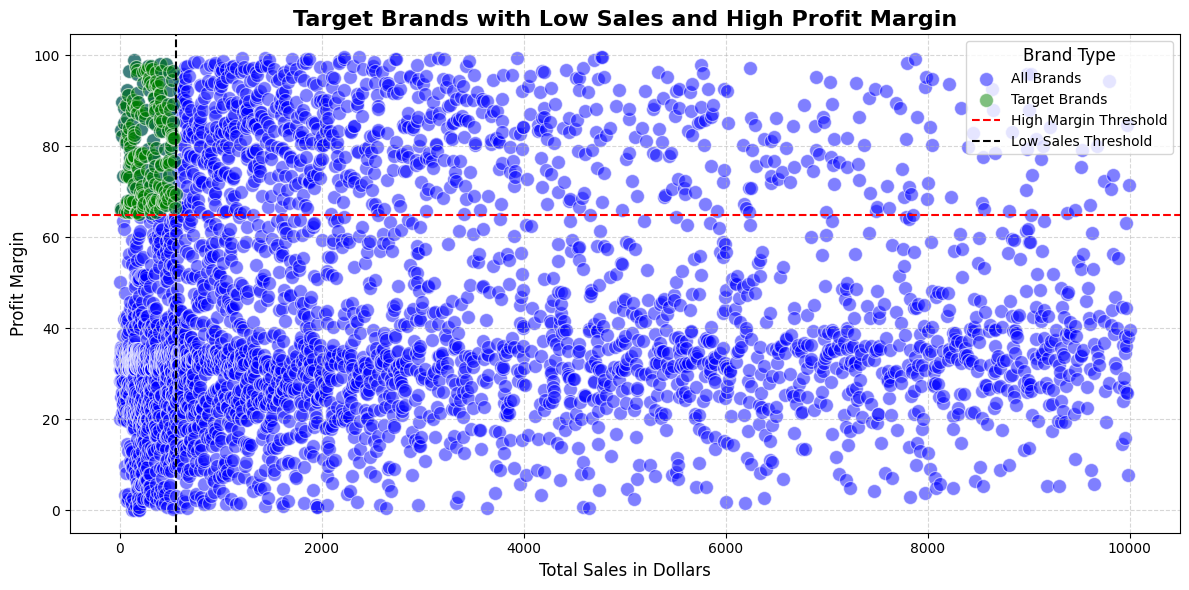

In [19]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data = brand_performance_limit, x = 'TotalSalesDollars', y = 'ProfitMargin', color = 'blue', s = 100, label = 'All Brands', alpha = 0.5)
sns.scatterplot(data = target_brands, x = 'TotalSalesDollars', y = 'ProfitMargin', color = 'green', s = 100, label = 'Target Brands', alpha = 0.5)

plt.axhline(y = high_margin_threshold, color = 'red', linestyle = '--', label = 'High Margin Threshold')
plt.axvline(x = low_sales_threshold, color = 'black', linestyle = '--', label = 'Low Sales Threshold')

plt.xlabel('Total Sales in Dollars', fontsize = 12)
plt.ylabel('Profit Margin', fontsize = 12)
plt.title('Target Brands with Low Sales and High Profit Margin', fontsize = 16, fontweight = 'bold')
plt.legend(title = 'Brand Type', fontsize = 10, title_fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

### 2. Which vendors and brands demonstrate the highest sales performance?

In [20]:
def format_dollars(value):
    if value >= 1e6:
        return f'{value / 1e6:.2f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.2f}K'
    else:
        return f'{value:.2f}'

In [21]:
## Top vendors and brands by sales performance

top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [22]:
top_vendors.apply(lambda x: format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

In [23]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

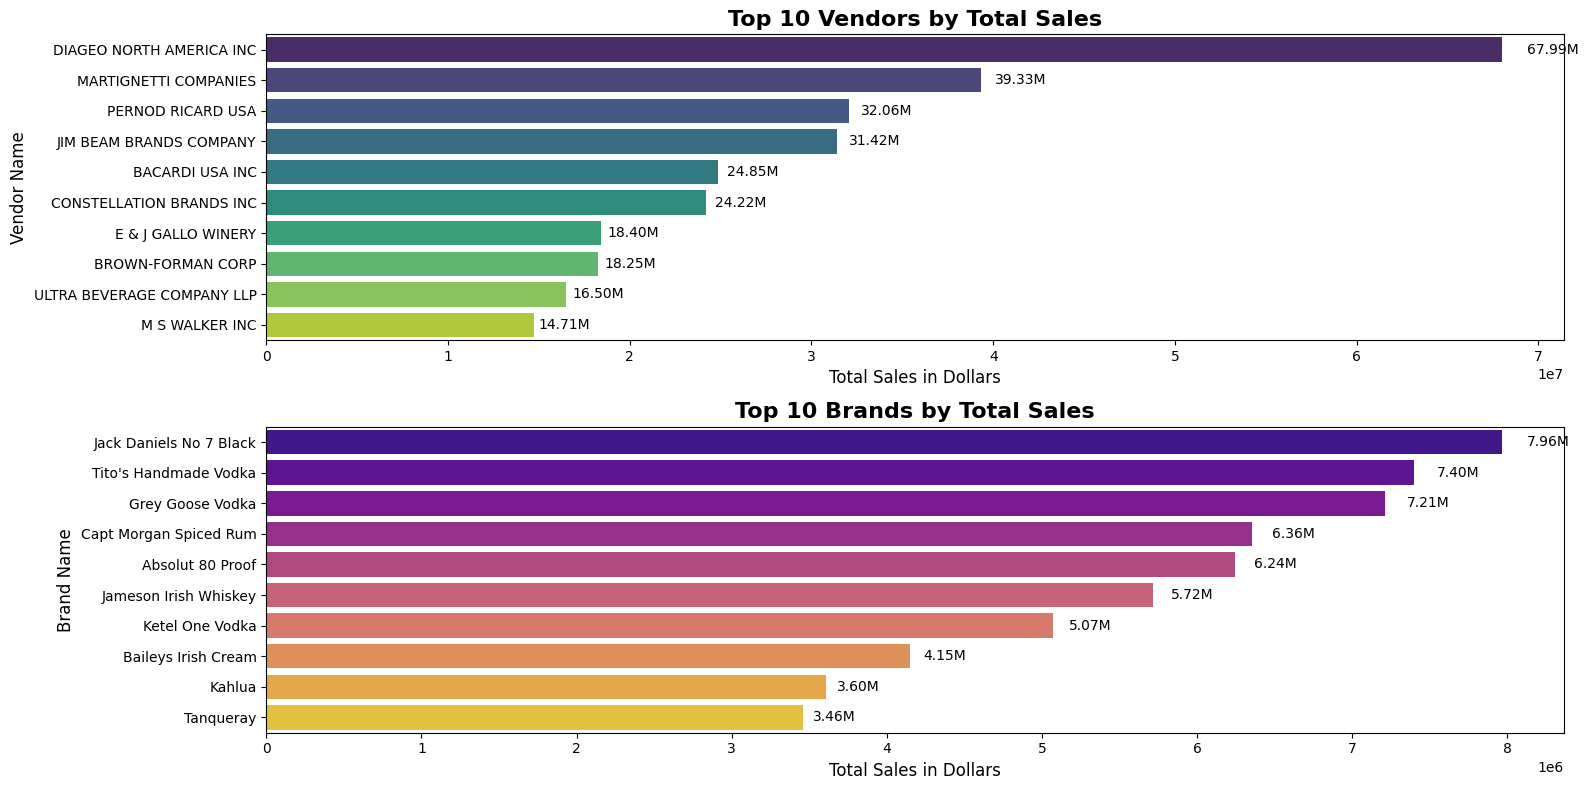

In [24]:
plt.figure(figsize = (16, 8))

## Plot fror top vendors
plt.subplot(2, 1, 1)
ax1 = sns.barplot(y = top_vendors.index, x = top_vendors.values, palette = 'viridis')
ax1.set_title('Top 10 Vendors by Total Sales', fontsize = 16, fontweight = 'bold')
ax1.set_ylabel('Vendor Name', fontsize = 12)
ax1.set_xlabel('Total Sales in Dollars', fontsize = 12)

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height()/2,
        format_dollars(bar.get_width()),
        ha = 'left', va = 'center', fontsize = 10
    )

## Plot for top brands
plt.subplot(2, 1, 2)
ax2 = sns.barplot(y = top_brands.index, x = top_brands.values, palette = 'plasma')
ax2.set_title('Top 10 Brands by Total Sales', fontsize = 16, fontweight = 'bold')
ax2.set_ylabel('Brand Name', fontsize = 12)
ax2.set_xlabel('Total Sales in Dollars', fontsize = 12)

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height()/2,
        format_dollars(bar.get_width()),
        ha = 'left', va = 'center', fontsize = 10
    )

plt.tight_layout()
plt.show()

### 3. Which vendors contribute the most to TotalPurchaseDollars?

In [25]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum',
}).reset_index().sort_values(by = 'TotalPurchaseDollars', ascending = False)

vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14
...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59
107,UNCORKED,118.74,58.20,176.94
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87


In [26]:
vendor_performance['PurchaseContribution'] = round(vendor_performance['TotalPurchaseDollars']*100 / vendor_performance['TotalPurchaseDollars'].sum(), 2)
vendor_performance.sort_values(by = 'PurchaseContribution', ascending = False)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [27]:
## Display top 10 vendors by purchase contribution

top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [28]:
top_vendors['CumulativeContribution'] = top_vendors['PurchaseContribution'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,CumulativeContribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


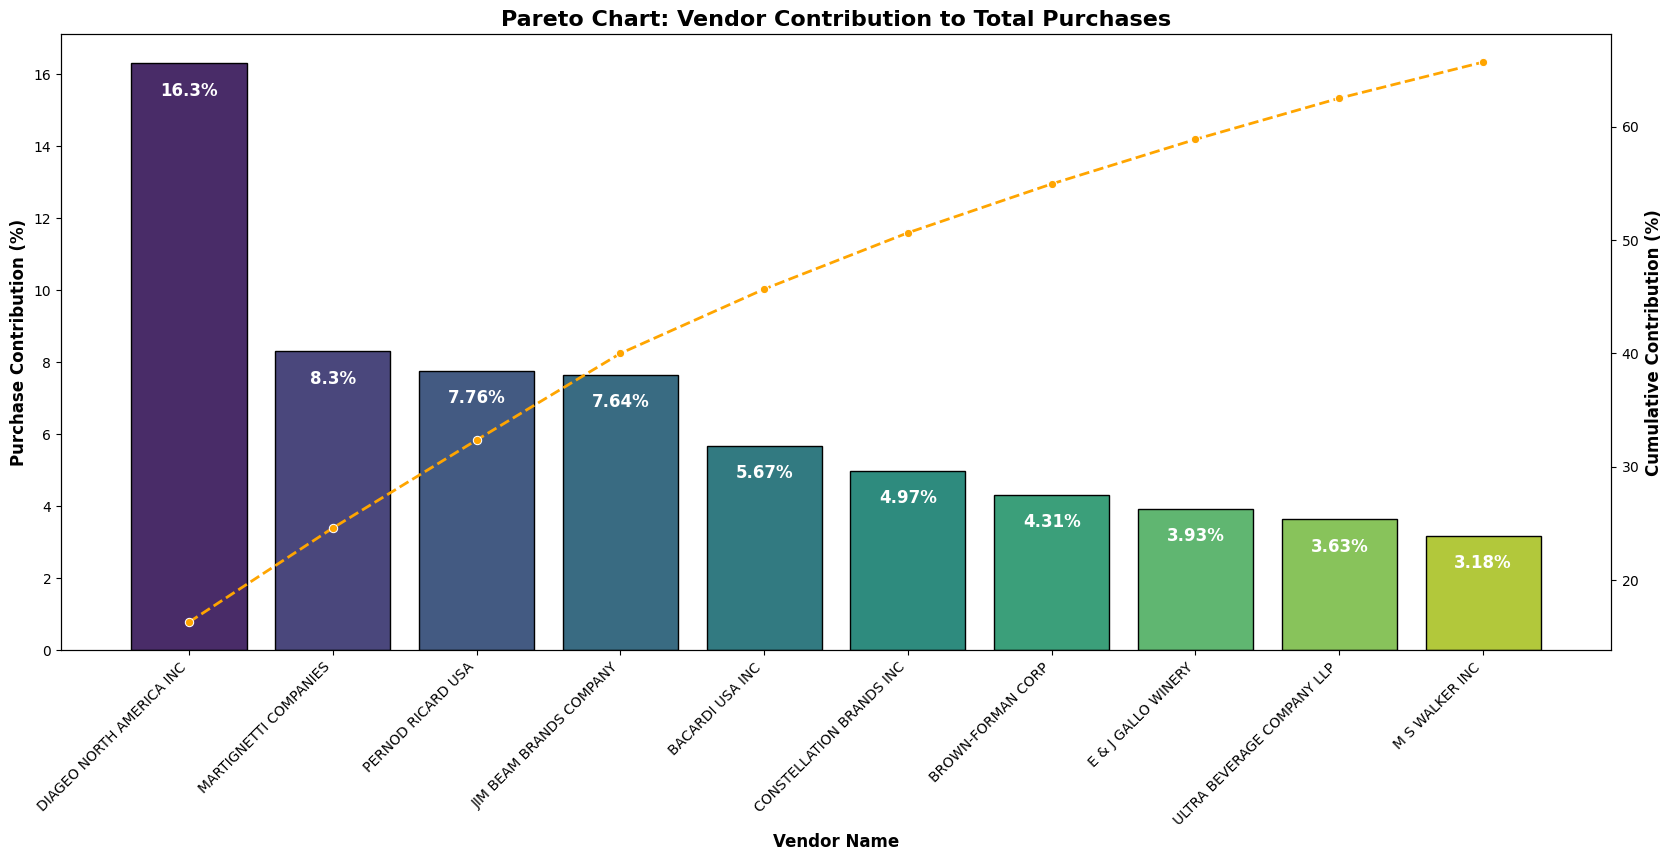

In [29]:
fig, ax1 = plt.subplots(figsize = (20, 8))

## Bar plot for purchase contribution

sns.barplot(x = top_vendors['VendorName'], y = top_vendors['PurchaseContribution'], ax = ax1, palette = 'viridis', edgecolor = 'black')
ax1.set_title('Top 10 Vendors by Purchase Contribution', fontsize = 16, fontweight = 'bold')
ax1.set_xlabel('Vendor Name', fontsize = 12)
ax1.set_ylabel('Purchase Contribution', fontsize = 12)

for i, value in enumerate(top_vendors['PurchaseContribution']):
    ax1.text(
        i, value-1, str(value)+'%', ha = 'center', va = 'bottom', fontsize = 12, fontweight = 'bold', color = 'white'
    )

## Line plot for cumulative contribution

ax2 = ax1.twinx()
sns.lineplot(x = top_vendors['VendorName'], y = top_vendors['CumulativeContribution'], ax = ax2, color = 'orange', marker = 'o', linestyle = 'dashed', linewidth = 2)
ax1.set_xticklabels(top_vendors['VendorName'], rotation = 45, ha = 'right', fontsize = 10)

ax1.set_ylabel('Purchase Contribution (%)', fontsize = 12, fontweight = 'bold')
ax2.set_ylabel('Cumulative Contribution (%)', fontsize = 12, fontweight = 'bold')
ax1.set_xlabel('Vendor Name', fontsize = 12, fontweight = 'bold')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases', fontsize = 16, fontweight = 'bold')

# ax2.axhline(y = 100, color = 'gray', linestyle = 'dashed', alpha = 0.7)
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText = True))
ax2.yaxis.set_major_locator(MaxNLocator(nbins = 6, prune = 'both'))

plt.show()

### 4. How much of the total procurement is dependent on the top vendors?

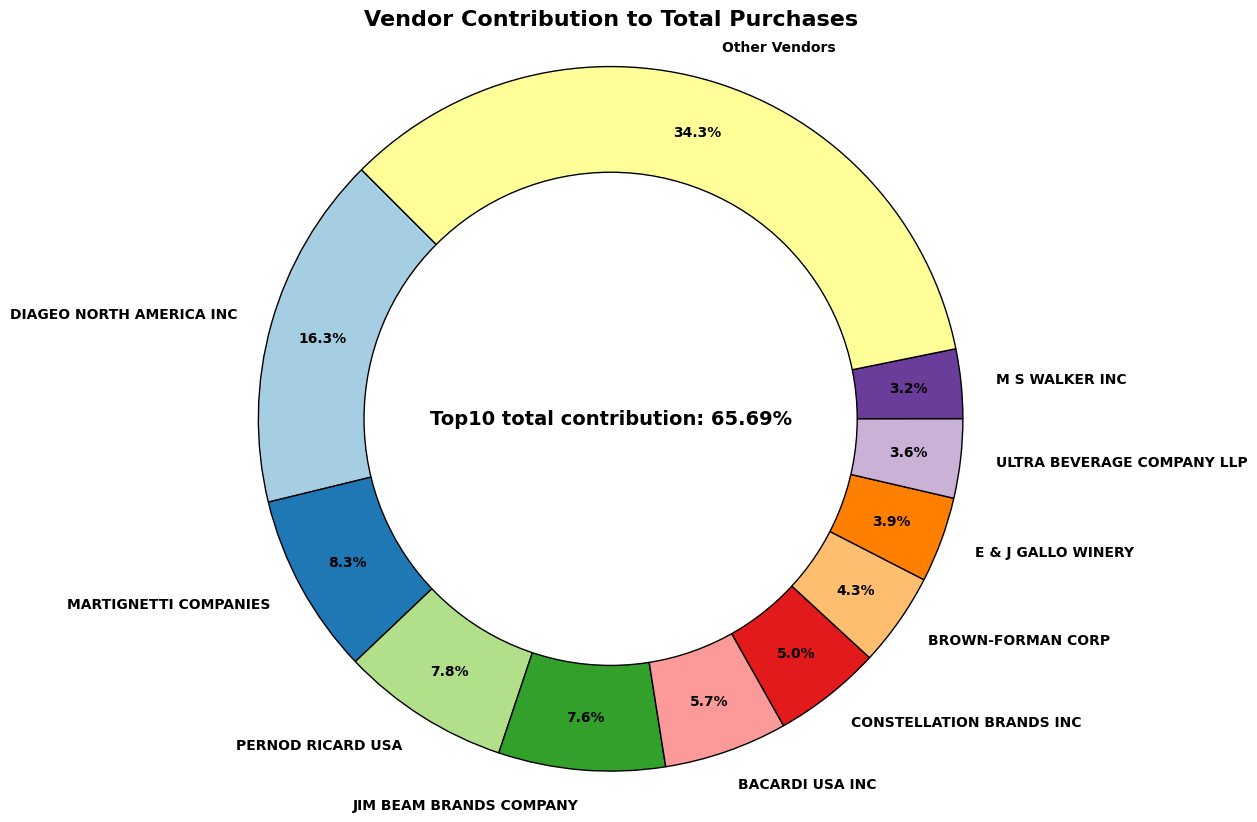

In [30]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

## Append "Other Vendors" category to the lists

vendors.append('Other Vendors')
purchase_contribution.append(remaining_contribution)

## Donut chart for vendor contribution

fig, ax = plt.subplots(figsize = (10, 10))
wedges, texts, autotexts = ax.pie(
    purchase_contribution,
    labels = vendors,
    autopct = '%1.1f%%',
    startangle = 135,
    pctdistance = 0.85,
    colors = plt.cm.Paired.colors,
    wedgeprops = {'edgecolor': 'black'}
)

# Make labels and percentages bold
for text in texts:
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontweight('bold')

## Draw a circle at the center of the pie to create a donut chart

centre_circle = plt.Circle((0, 0), 0.70, fc = 'white', edgecolor = 'black', linewidth = 1)
fig.gca().add_artist(centre_circle)

## Add total contribution annotation in the center of the donut chart

plt.text(0, 0, f'Top10 total contribution: {total_contribution:.2f}%',
         horizontalalignment = 'center', verticalalignment = 'center', fontsize = 14, fontweight = 'bold')
plt.title('Vendor Contribution to Total Purchases', fontsize = 16, fontweight = 'bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 5. Does purchasing in bulk reduce the unit cost, and what is the optimal purchase volume for cost savings?

In [31]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [32]:
(df['PurchasePrice'] == df['UnitPurchasePrice']).value_counts()

True     6153
False    2411
Name: count, dtype: int64

In [33]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q = 3, labels = ['Small', 'Medium', 'Large'])
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [34]:
df[['OrderSize']].value_counts()

OrderSize
Small        2856
Large        2855
Medium       2853
Name: count, dtype: int64

In [35]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean().reset_index()

,OrderSize,UnitPurchasePrice
0,Small,39.068186
1,Medium,15.486414
2,Large,10.777625


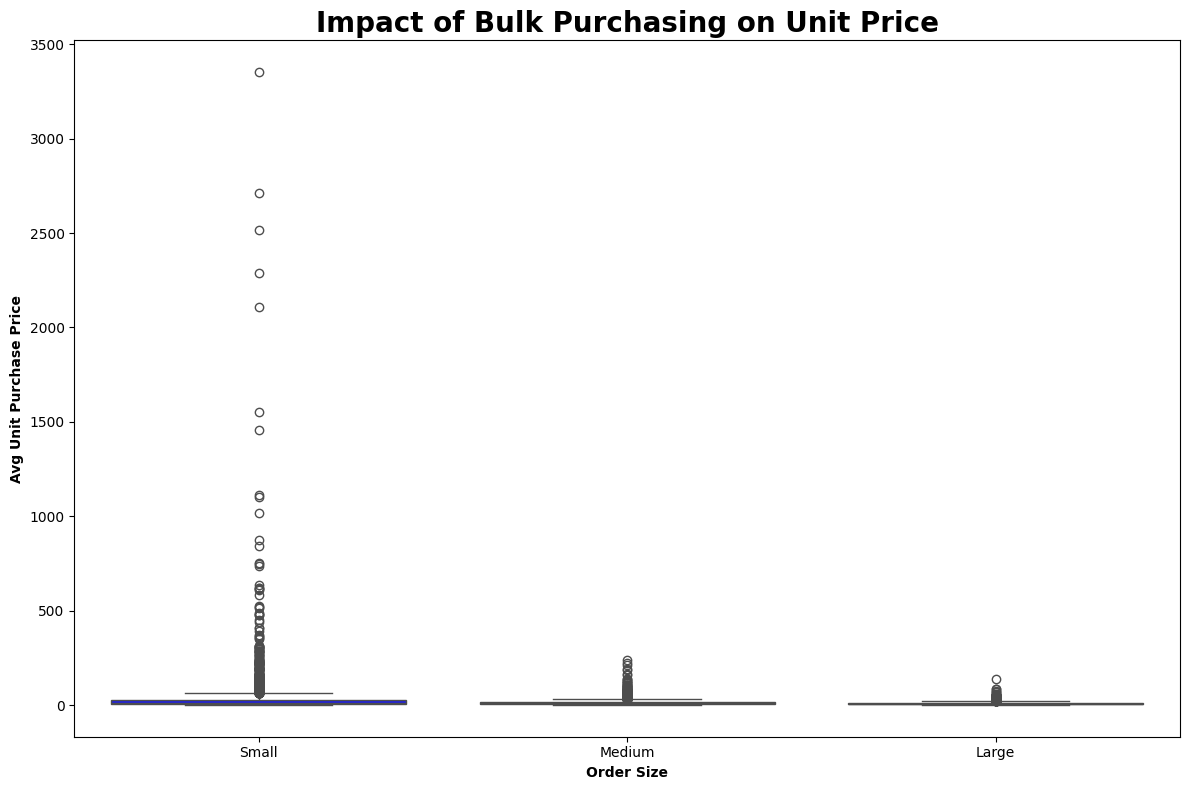

In [36]:
# Set figure size based on number of plots

plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = "OrderSize", y ="UnitPurchasePrice", color = 'blue')
plt.xlabel('Order Size', fontsize = 10, fontweight = 'bold')
plt.ylabel('Avg Unit Purchase Price', fontsize = 10, fontweight = 'bold')
plt.title('Impact of Bulk Purchasing on Unit Price', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

### Insights

- Vendors buying in bulk (Large Order size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently
- The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
- This suggests that bulk pricing strategy succesfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue

### 6. Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [37]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().reset_index().sort_values(by = 'StockTurnover', ascending = True)

,VendorName,StockTurnover
0,ALISA CARR BEVERAGES,0.615385
36,HIGHLAND WINE MERCHANTS LLC,0.708333
60,PARK STREET IMPORTS LLC,0.751306
19,Circa Wines,0.755676
26,Dunn Wine Brokers,0.766022
...,...,...
23,DISARONNO INTERNATIONAL LLC,0.975577
67,"PREMIUM PORT WINES, INC.",0.976077
95,TY KU LLC,0.976982
63,PHILLIPS PRODUCTS CO.,0.980848


### 7. How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [38]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,...,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,...,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large,49712.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,...,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32,Small,-3.96
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,...,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small,-49.92
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,...,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small,0.00
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,...,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small,-104.37


In [39]:
print('Total Unsold Capital Locked in Inventory: $' + format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital Locked in Inventory: $2.71M


In [40]:
## Aggregate Capital Locked in Unsold Inventory by Vendor

inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index().sort_values(by = 'UnsoldInventoryValue', ascending = False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


### 8. What is the 95% confidence interval for profit margins of top-performing and low-performing vendors?

In [41]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

print(f'Top 25% Sales Threshold: ${format_dollars(top_threshold)}')
print(f'Bottom 25% Sales Threshold: ${format_dollars(low_threshold)}')

Top 25% Sales Threshold: $40.62K
Bottom 25% Sales Threshold: $1.36K


In [42]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [43]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [44]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [45]:
## Defining a function to calculate confidence intervals

def confidence_interval(data, confidence = 0.95):
    mean_val = np.mean(data)
    sem = stats.sem(data)
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2, df = len(data) - 1)
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

In [46]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors within 95% Confidence Interval: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors within 95% Confidence Interval: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

Top Vendors within 95% Confidence Interval: (30.74, 31.61), Mean: 31.18
Low Vendors within 95% Confidence Interval: (40.50, 42.64), Mean: 41.57


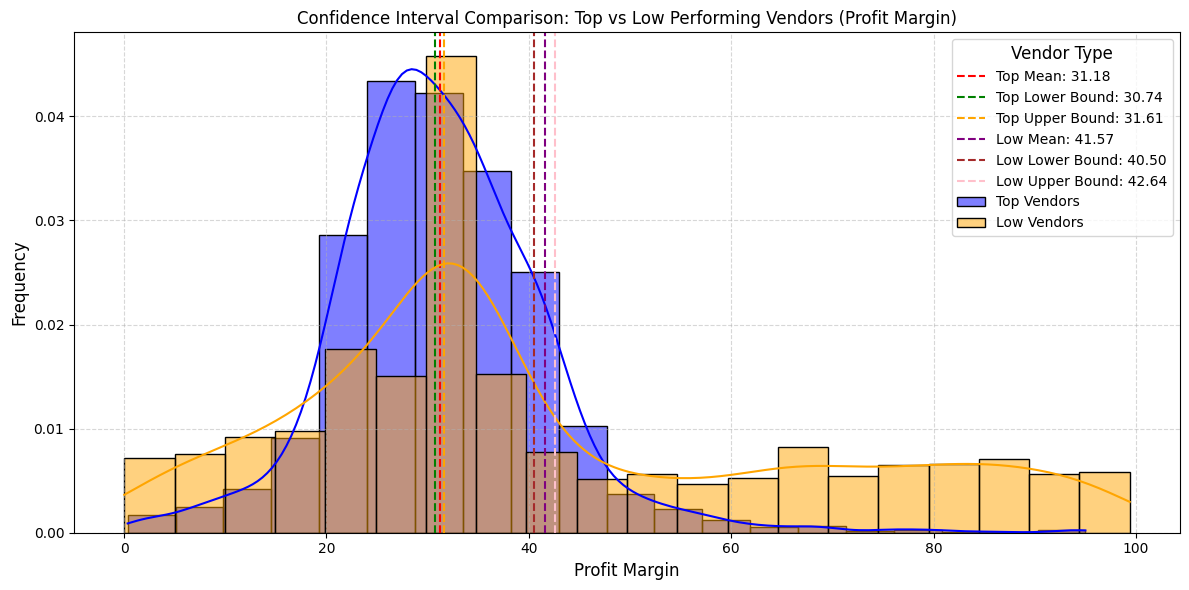

In [47]:
plt.figure(figsize = (12, 6))

## Plot for top vendors

sns.histplot(top_vendors, kde = True, color = 'blue', bins = 20, label = 'Top Vendors', stat = 'density')
plt.axvline(top_mean, color = 'red', linestyle = '--', label = f"Top Mean: {top_mean:.2f}")
plt.axvline(top_lower, color = 'green', linestyle = '--', label = f"Top Lower Bound: {top_lower:.2f}")
plt.axvline(top_upper, color = 'orange', linestyle = '--', label = f"Top Upper Bound: {top_upper:.2f}")

## Plot for low vendors

sns.histplot(low_vendors, kde = True, color = 'orange', bins = 20, label = 'Low Vendors', stat = 'density')
plt.axvline(low_mean, color = 'purple', linestyle = '--', label = f"Low Mean: {low_mean:.2f}")
plt.axvline(low_lower, color = 'brown', linestyle = '--', label = f"Low Lower Bound: {low_lower:.2f}")
plt.axvline(low_upper, color = 'pink', linestyle = '--', label = f"Low Upper Bound: {low_upper:.2f}")

## Finalize the plot

plt.title('Confidence Interval Comparison: Top vs Low Performing Vendors (Profit Margin)')
plt.xlabel('Profit Margin', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(title = 'Vendor Type', fontsize = 10, title_fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

### Insights:

- The confidence interval for low-performing vendors (40.50% to 42.64%) is significantly higher than that of top-performing vendors (30.74% to 31.61%)
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs
- For high-performing vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization or bundling strategies
- For low-performing vendors: Despite their higher margins, their low sales volume might indicate a need for better marketing, competitive pricing or improved distribution strategies

## Hypothesis Testing: Is there a significant difference in profit margins between top-performing and low-performing vendors?

### Hypothesis:

- H<sub>0</sub> (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
- H<sub>1</sub> (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different

In [48]:
## Performing a simple two-tailed t-test to compare the means of profit margins between top-performing and low-performing vendors
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var = False)

## Print the results of the t-test

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in profit margins between top-performing and low-performing vendors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in profit margins between top-performing and low-performing vendors.")

T-statistic: -17.6695, P-value: 0.0000
Reject the null hypothesis: There is a significant difference in profit margins between top-performing and low-performing vendors.
